<a href="https://colab.research.google.com/github/ARRGUPT/song-recommendation-model/blob/aryan/song_recommendation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as mp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import OneHotEncoder, StandardScaler
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
from google.colab import files
uploaded = files.upload()

Saving songs_dataset.csv to songs_dataset (1).csv


In [4]:
df = pd.read_csv('songs_dataset.csv', encoding='latin-1')

In [5]:
df.head()

,Sr.,Song,Singer,Mood,Movie,User-Rating
0,1,Aankh Marey,"Kumar Sanu, Mika Singh, Neha Kakkar",Dance,Simmba,8.8/10
1,2,Coca Cola,"Neha Kakkar, Tony Kakkar",DanceRomantic,Luka Chuppi,9.0/10
2,3,Apna Time Aayega,Ranveer Singh,Dance,Gully Boy,9.7/10
3,4,Mungda,"Jyotica Tangri, Shaan, Subhro Ganguly",Dance,Total Dhamaal,9.1/10
4,5,Tere Bin,"Asees Kaur, Rahat Fateh Ali Khan, Tanishk Bagchi",Romantic,Simmba,9.2/10


In [6]:
df.drop(['Sr.'], axis=1, inplace=True)

In [7]:
df.head()

,Song,Singer,Mood,Movie,User-Rating
0,Aankh Marey,"Kumar Sanu, Mika Singh, Neha Kakkar",Dance,Simmba,8.8/10
1,Coca Cola,"Neha Kakkar, Tony Kakkar",DanceRomantic,Luka Chuppi,9.0/10
2,Apna Time Aayega,Ranveer Singh,Dance,Gully Boy,9.7/10
3,Mungda,"Jyotica Tangri, Shaan, Subhro Ganguly",Dance,Total Dhamaal,9.1/10
4,Tere Bin,"Asees Kaur, Rahat Fateh Ali Khan, Tanishk Bagchi",Romantic,Simmba,9.2/10


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2420 entries, 0 to 2419
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Song         2420 non-null   object
 1   Singer       2410 non-null   object
 2   Mood         2318 non-null   object
 3   Movie        2417 non-null   object
 4   User-Rating  2420 non-null   object
dtypes: object(5)
memory usage: 94.7+ KB


In [9]:
df.isnull().sum()

,0
Song,0
Singer,10
Mood,102
Movie,3
User-Rating,0


In [10]:
df_cleaned = df.copy()

In [11]:
mood_mode = df_cleaned['Mood'].mode()[0]
df_cleaned['Mood'].fillna(mood_mode, inplace=True)

<ipython-input-11-552875edf361>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cleaned['Mood'].fillna(mood_mode, inplace=True)


In [12]:
df_cleaned.isnull().sum()

,0
Song,0
Singer,10
Mood,0
Movie,3
User-Rating,0


In [13]:
df_cleaned.dropna(inplace = True)

In [14]:
df_cleaned.isnull().sum()

,0
Song,0
Singer,0
Mood,0
Movie,0
User-Rating,0


In [15]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2407 entries, 0 to 2419
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Song         2407 non-null   object
 1   Singer       2407 non-null   object
 2   Mood         2407 non-null   object
 3   Movie        2407 non-null   object
 4   User-Rating  2407 non-null   object
dtypes: object(5)
memory usage: 112.8+ KB


In [16]:
df_cleaned.head()

,Song,Singer,Mood,Movie,User-Rating
0,Aankh Marey,"Kumar Sanu, Mika Singh, Neha Kakkar",Dance,Simmba,8.8/10
1,Coca Cola,"Neha Kakkar, Tony Kakkar",DanceRomantic,Luka Chuppi,9.0/10
2,Apna Time Aayega,Ranveer Singh,Dance,Gully Boy,9.7/10
3,Mungda,"Jyotica Tangri, Shaan, Subhro Ganguly",Dance,Total Dhamaal,9.1/10
4,Tere Bin,"Asees Kaur, Rahat Fateh Ali Khan, Tanishk Bagchi",Romantic,Simmba,9.2/10


In [17]:
df_cleaned.describe()

,Song,Singer,Mood,Movie,User-Rating
count,2407,2407,2407,2407,2407
unique,2327,1214,19,900,38
top,Tere Naina,Mohammed Rafi,Dance,Bajirao Mastani,9.4/10
freq,3,55,1322,10,278


In [18]:
df_cleaned.drop_duplicates(subset=['Song'],inplace=True)

In [19]:
df_cleaned.describe()

,Song,Singer,Mood,Movie,User-Rating
count,2327,2327,2327,2327,2327
unique,2327,1192,19,888,38
top,Aankh Marey,Mohammed Rafi,Dance,Bajirao Mastani,9.4/10
freq,1,55,1283,10,267


In [20]:
# converting user-rating from object dtype to numeric

In [21]:
df_cleaned['User-Rating'] = df_cleaned['User-Rating'].str.replace('/10', '')
df_cleaned['User-Rating'] = pd.to_numeric(df_cleaned['User-Rating'], errors='coerce')

In [22]:
df_cleaned

,Song,Singer,Mood,Movie,User-Rating
0,Aankh Marey,"Kumar Sanu, Mika Singh, Neha Kakkar",Dance,Simmba,8.8
1,Coca Cola,"Neha Kakkar, Tony Kakkar",DanceRomantic,Luka Chuppi,9.0
2,Apna Time Aayega,Ranveer Singh,Dance,Gully Boy,9.7
3,Mungda,"Jyotica Tangri, Shaan, Subhro Ganguly",Dance,Total Dhamaal,9.1
4,Tere Bin,"Asees Kaur, Rahat Fateh Ali Khan, Tanishk Bagchi",Romantic,Simmba,9.2
...,...,...,...,...,...
2415,Jana Tumhare Pyar Mein,Mukesh,Dance,Sasural,NaN
2416,Tum Jaise Bigde Babu Se,Lata Mangeshkar,Dance,Jab Pyar Kisi Se Hota Hai,NaN
2417,O Yaad Nahi Bhool Gaya,"Lata Mangeshkar, Suresh Wadkar",Dance,Lamhe,NaN
2418,Ladi Re Ladi Tujhse Aankh Jo Ladi,Jagjit Kaur,Dance,Shola Aur Shabnam,NaN


In [23]:
df_cleaned.isnull().sum()

,0
Song,0
Singer,0
Mood,0
Movie,0
User-Rating,12


In [24]:
df_cleaned.dropna(subset=['User-Rating'], inplace=True)

In [25]:
df_cleaned.isnull().sum()

,0
Song,0
Singer,0
Mood,0
Movie,0
User-Rating,0


In [26]:
df_cleaned.info()            # to check user-rating is converted into numeric or not

<class 'pandas.core.frame.DataFrame'>
Index: 2315 entries, 0 to 2419
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Song         2315 non-null   object 
 1   Singer       2315 non-null   object 
 2   Mood         2315 non-null   object 
 3   Movie        2315 non-null   object 
 4   User-Rating  2315 non-null   float64
dtypes: float64(1), object(4)
memory usage: 108.5+ KB


In [27]:
df_cleaned['Mood'].value_counts()

,count
Mood,
Dance,1276
Romantic,573
Sad,281
DanceRomantic,51
RomanticSad,29
Devotional,25
Patriotic,20
Motivational,19
Romance,14


<ipython-input-28-b017cd30327c>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_cleaned, x='Mood', palette='Blues')


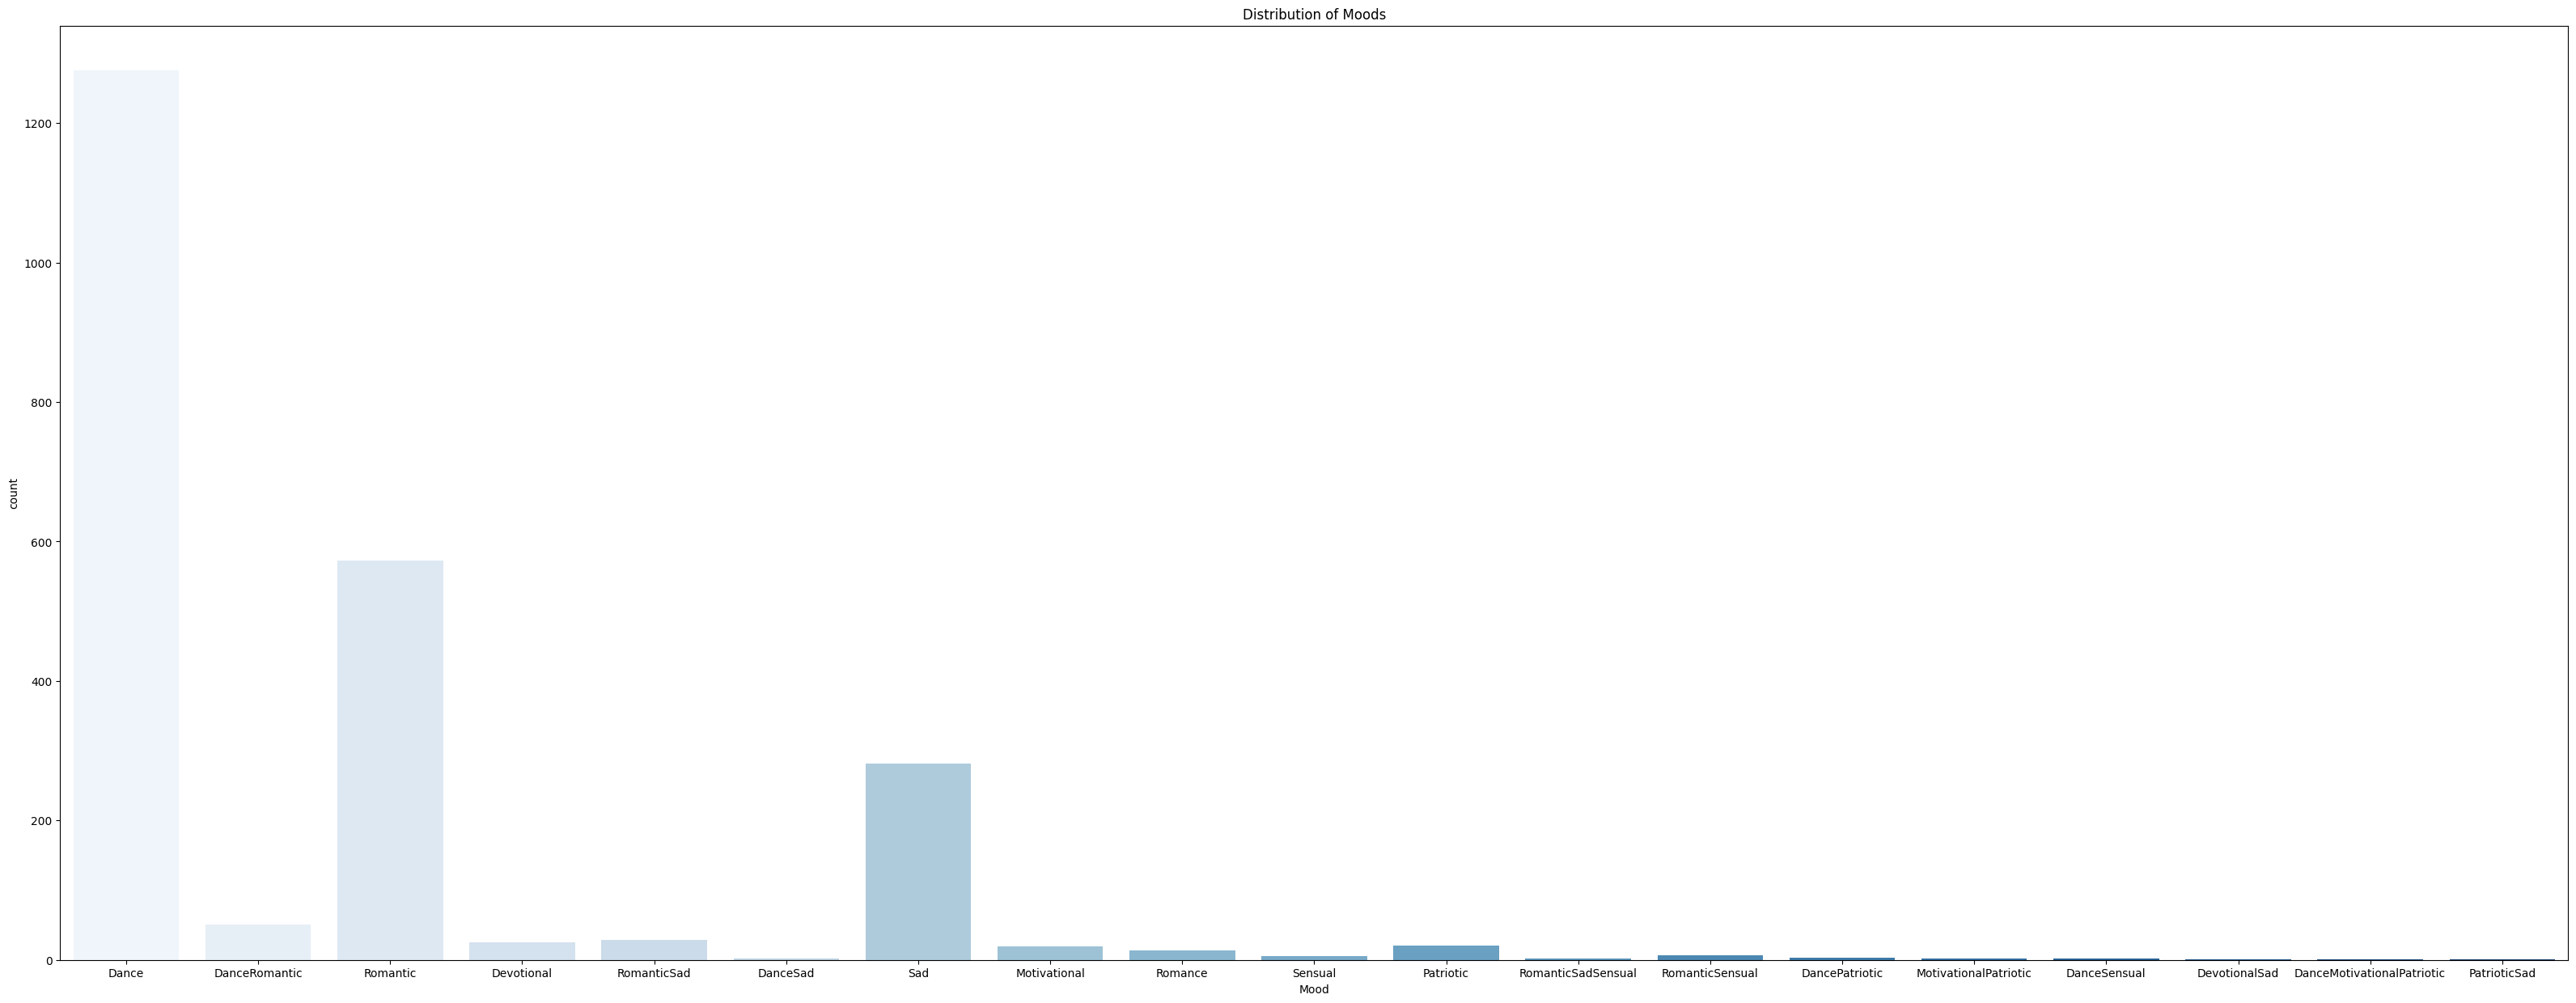

In [28]:
plt.figure(figsize=(40, 15))
sns.countplot(data=df_cleaned, x='Mood', palette='Blues')
plt.title("Distribution of Moods")
plt.show()

In [29]:
# Top songs by rating

In [30]:
df_cleaned.nlargest(10, 'User-Rating')[['Song', 'Singer', 'User-Rating']]

,Song,Singer,User-Rating
124,Ishq Di Baajiyan,Diljit Dosanjh,9.9
158,Soorma Anthem,Shankar Mahadevan,9.9
114,Sawarne Lage,Jubin Nautiyal,9.8
554,Ishq Bulaava,Sanam Puri,9.8
1401,Saawali Si Raat,Arijit Singh,9.8
2185,Tere Ishq Ka Suroor,"Aaman Trikha, Akshata Dixit",9.8
2293,Rang De,"Shankar Mahadevan, Suraj Jagan",9.8
2,Apna Time Aayega,Ranveer Singh,9.7
15,Doori,Ranveer Singh,9.7
50,Mantoiyat,Raftaar,9.7


<ipython-input-31-c8a00b4257a6>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_songs, x='User-Rating', y='Song', palette='Purples')


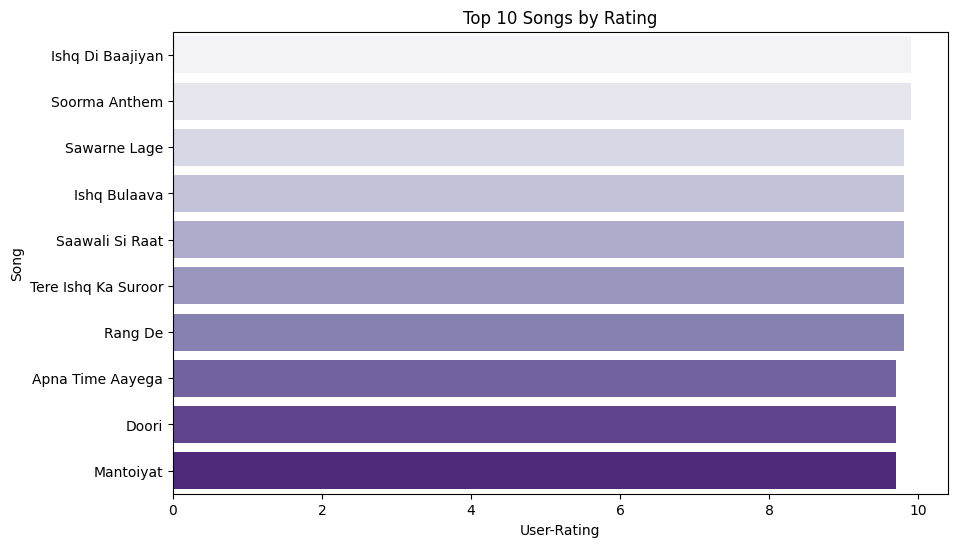

In [31]:
top_songs = df_cleaned.nlargest(10, 'User-Rating')
plt.figure(figsize=(10, 6))
sns.barplot(data=top_songs, x='User-Rating', y='Song', palette='Purples')
plt.title("Top 10 Songs by Rating")
plt.show()

In [32]:
# Top movies by rating

In [33]:
df_cleaned.nlargest(10, 'User-Rating')[['Movie', 'User-Rating']]

,Movie,User-Rating
124,Soorma,9.9
158,Soorma,9.9
114,Mitron,9.8
554,Hasee Toh Phasee,9.8
1401,Barfi,9.8
2185,Single,9.8
2293,My Name is Khan,9.8
2,Gully Boy,9.7
15,Gully Boy,9.7
50,Manto,9.7


<ipython-input-34-5bf9cb95d4ab>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_movies, x='User-Rating', y='Movie', palette='Purples')


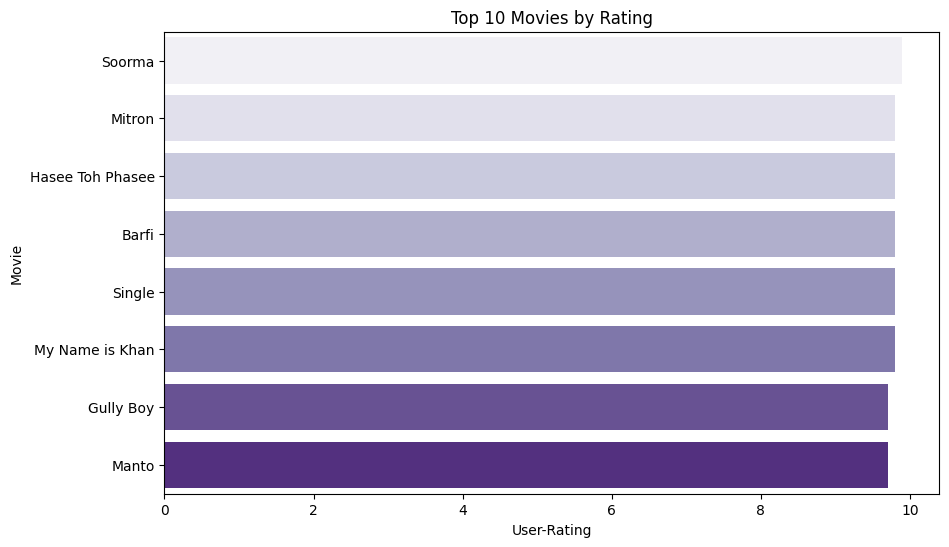

In [34]:
top_movies = df_cleaned.nlargest(10, 'User-Rating')
plt.figure(figsize=(10, 6))
sns.barplot(data=top_movies, x='User-Rating', y='Movie', palette='Purples')
plt.title("Top 10 Movies by Rating")
plt.show()

In [35]:
# Top singers by rating

In [36]:
df_cleaned.nlargest(10, 'User-Rating')[['Singer', 'User-Rating']]

,Singer,User-Rating
124,Diljit Dosanjh,9.9
158,Shankar Mahadevan,9.9
114,Jubin Nautiyal,9.8
554,Sanam Puri,9.8
1401,Arijit Singh,9.8
2185,"Aaman Trikha, Akshata Dixit",9.8
2293,"Shankar Mahadevan, Suraj Jagan",9.8
2,Ranveer Singh,9.7
15,Ranveer Singh,9.7
50,Raftaar,9.7


<ipython-input-37-488cd49266b6>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_singers, x='User-Rating', y='Singer', palette='Purples')


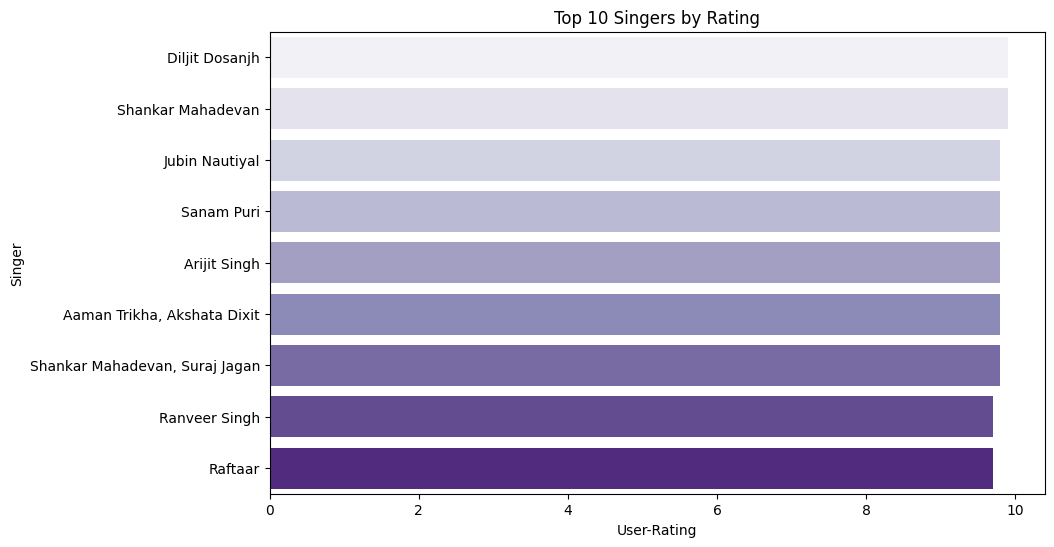

In [37]:
top_singers = df_cleaned.nlargest(10, 'User-Rating')
plt.figure(figsize=(10, 6))
sns.barplot(data=top_singers, x='User-Rating', y='Singer', palette='Purples')
plt.title("Top 10 Singers by Rating")
plt.show()

In [38]:
# Most common mood for each singer

In [39]:
singer_mood = df_cleaned.groupby('Singer')['Mood'].agg(lambda x: x.mode()[0]).value_counts()
print(singer_mood)

Mood
Dance                         790
Romantic                      216
Sad                            94
DanceRomantic                  21
Devotional                     13
RomanticSad                    11
Motivational                   10
Patriotic                       9
Sensual                         5
RomanticSensual                 4
Romance                         4
DanceSad                        2
DancePatriotic                  2
DevotionalSad                   1
DanceMotivationalPatriotic      1
RomanticSadSensual              1
PatrioticSad                    1
DanceSensual                    1
MotivationalPatriotic           1
Name: count, dtype: int64


In [40]:
# Most common mood for each movie

In [41]:
movie_mood = df_cleaned.groupby('Movie')['Mood'].agg(lambda x: x.mode()[0]).value_counts()
print(movie_mood)

Mood
Dance                         581
Romantic                      174
Sad                            76
DanceRomantic                  16
Patriotic                      11
Romance                         9
Devotional                      6
Motivational                    5
RomanticSad                     3
Sensual                         2
DanceMotivationalPatriotic      1
RomanticSensual                 1
PatrioticSad                    1
DancePatriotic                  1
RomanticSadSensual              1
Name: count, dtype: int64


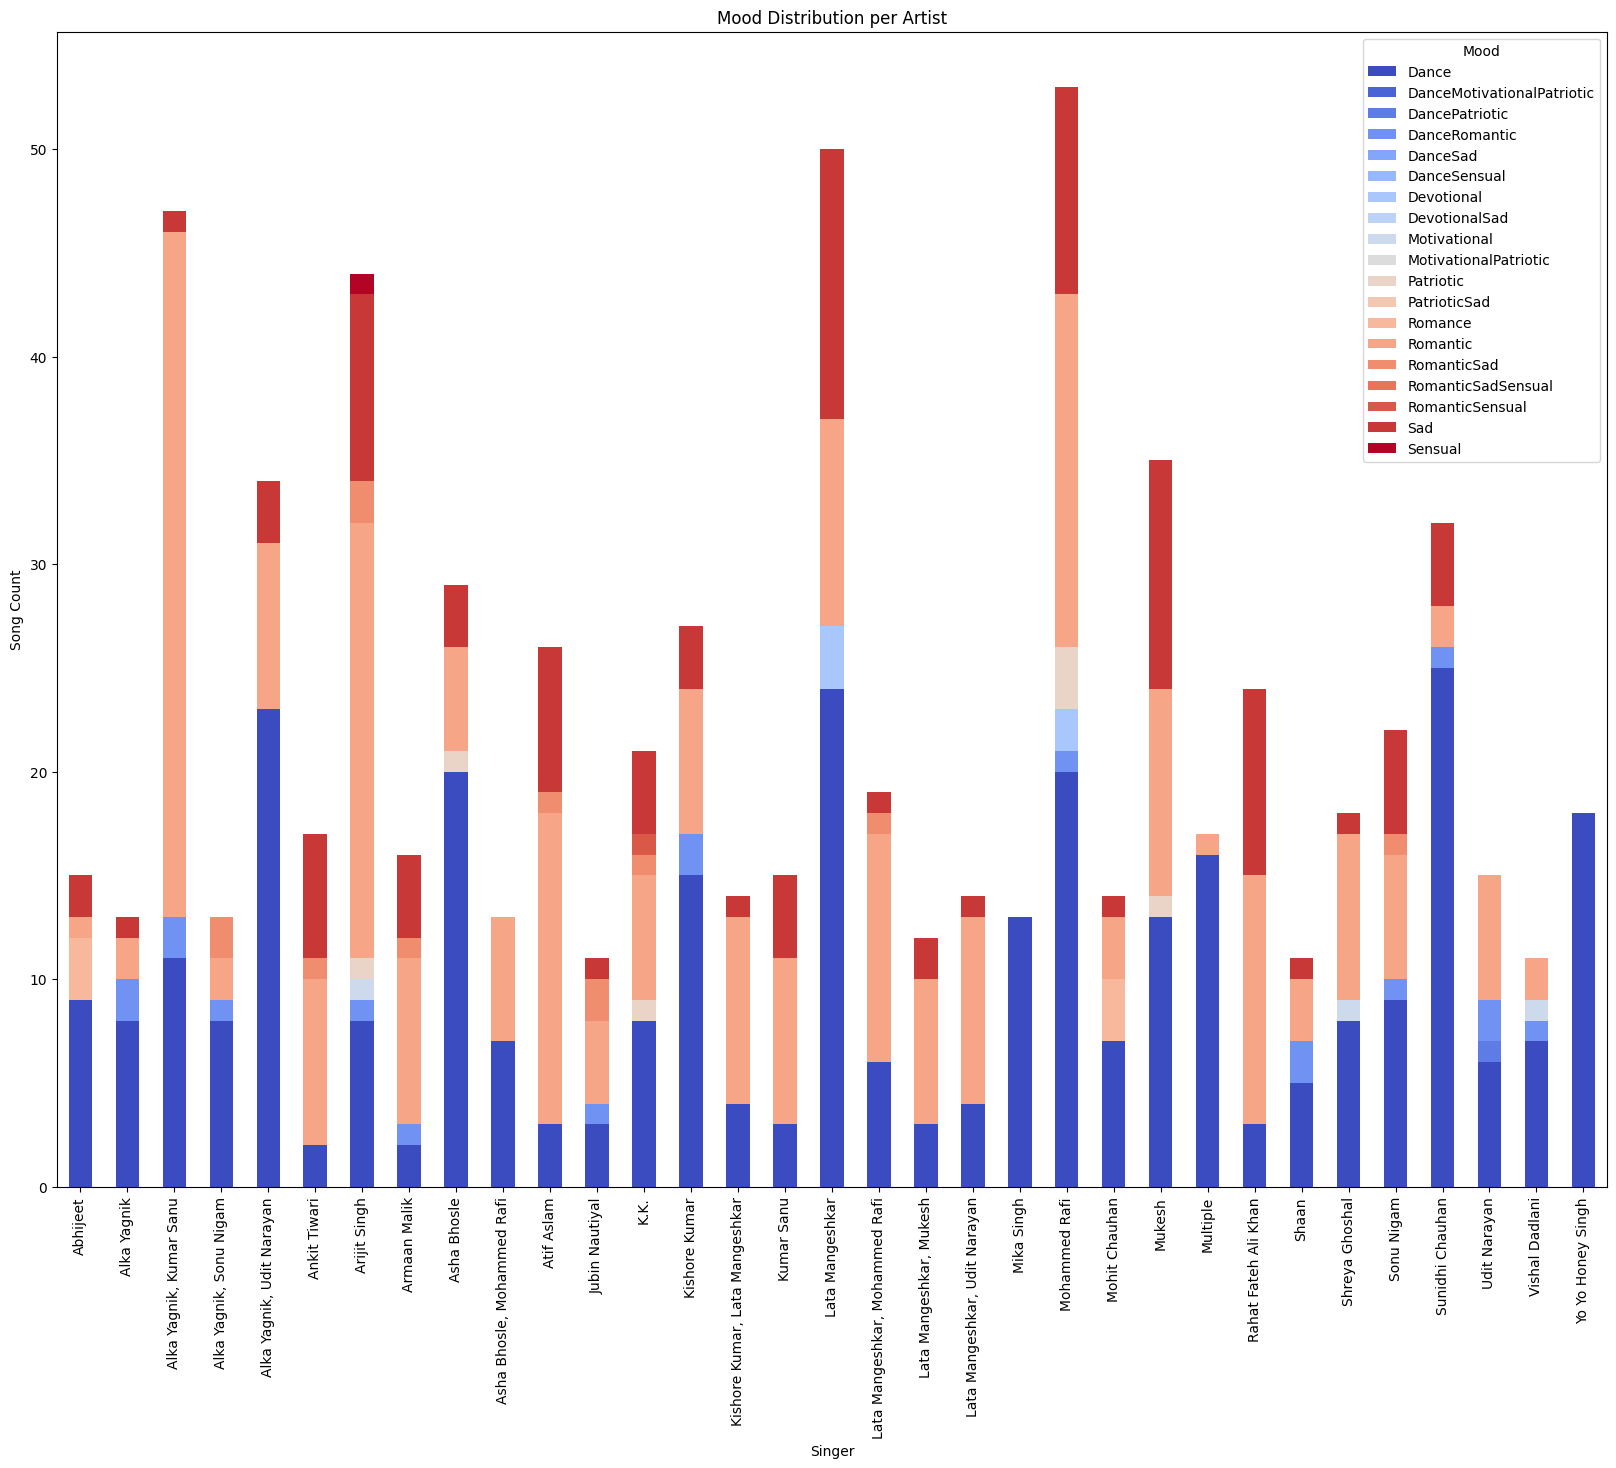

In [42]:
mood_artist = df_cleaned.pivot_table(index='Singer', columns='Mood', values='User-Rating', aggfunc='count').fillna(0)
mood_artist = mood_artist[mood_artist.sum(axis=1) > 10]

mood_artist.plot(kind='bar', stacked=True, figsize=(20, 15), colormap='coolwarm')
plt.title("Mood Distribution per Artist")
plt.ylabel("Song Count")
plt.show()

In [43]:
df_cleaned['User-Rating'].describe()                   # rating stats

,User-Rating
count,2315.000000
mean,9.071533
std,0.482097
min,5.800000
25%,8.900000
50%,9.200000
75%,9.400000
max,9.900000


In [44]:
df_cleaned.pivot_table(values='User-Rating', index='Mood', aggfunc=['mean', 'count'])      # relationship b/w diff variables

,mean,count
,User-Rating,User-Rating
Mood,,
Dance,8.998119,1276
DanceMotivationalPatriotic,9.300000,1
DancePatriotic,9.066667,3
DanceRomantic,9.054902,51
DanceSad,9.150000,2
DanceSensual,9.350000,2
Devotional,9.136000,25
DevotionalSad,9.600000,1


In [45]:
# Singers with highest average ratings in (minimum 10 songs)        # why i did this:- for Making Recommendations

In [46]:
df_cleaned.groupby('Singer').agg(User_Rating_mean=('User-Rating', 'mean'), User_Rating_count=('User-Rating', 'count')).query('User_Rating_count >=10').sort_values('User_Rating_mean', ascending=False)

,User_Rating_mean,User_Rating_count
Singer,,
Vishal Dadlani,9.463636,11
Jubin Nautiyal,9.454545,11
Mohit Chauhan,9.450000,14
Armaan Malik,9.443750,16
Atif Aslam,9.415385,26
Arijit Singh,9.413636,44
K.K.,9.385714,21
Ankit Tiwari,9.352941,17
"Shreya Ghoshal, Sonu Nigam",9.280000,10


In [47]:
df_cleaned.shape

(2315, 5)

In [48]:
# Encoding and concatination of mood and singer

In [49]:
encoder = OneHotEncoder(sparse_output=False)                # encode initialized

In [50]:
# Encode mood
mood_encoded = encoder.fit_transform(df_cleaned[['Mood']])
mood_df = pd.DataFrame(mood_encoded, columns=encoder.get_feature_names_out(['Mood']))

In [51]:
# Encode singer
singer_encoded = encoder.fit_transform(df_cleaned[['Singer']])
singer_df = pd.DataFrame(singer_encoded, columns=encoder.get_feature_names_out(['Singer']))

In [52]:
# concatination of mood & singer
df_encoded = pd.concat([df_cleaned ,mood_df, singer_df], axis=1)

In [53]:
df_encoded.drop(['Mood', 'Singer'], axis=1)

,Song,Movie,User-Rating,Mood_Dance,Mood_DanceMotivationalPatriotic,Mood_DancePatriotic,Mood_DanceRomantic,Mood_DanceSad,Mood_DanceSensual,Mood_Devotional,...,Singer_Vipin Aneja,Singer_Vishal Bhardwaj,Singer_Vishal Dadlani,Singer_Wajid,Singer_Wajid Khan,Singer_YRF,Singer_Yasser Desai,Singer_Yo Yo Honey Singh,Singer_Zebunnisa Bangash,Singer_Zubeen Garg
0,Aankh Marey,Simmba,8.8,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Coca Cola,Luka Chuppi,9.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Apna Time Aayega,Gully Boy,9.7,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Mungda,Total Dhamaal,9.1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Tere Bin,Simmba,9.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2201,NaN,NaN,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2260,NaN,NaN,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2268,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2278,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [54]:
mood_df.shape

(2315, 19)

In [55]:
singer_df.shape

(2315, 1187)

In [56]:
df_encoded.tail(180)

,Song,Singer,Mood,Movie,User-Rating,Mood_Dance,Mood_DanceMotivationalPatriotic,Mood_DancePatriotic,Mood_DanceRomantic,Mood_DanceSad,...,Singer_Vipin Aneja,Singer_Vishal Bhardwaj,Singer_Vishal Dadlani,Singer_Wajid,Singer_Wajid Khan,Singer_YRF,Singer_Yasser Desai,Singer_Yo Yo Honey Singh,Singer_Zebunnisa Bangash,Singer_Zubeen Garg
2313,Anjaana Anjaani Ki Kahani,"Monali Thakur, Nikhil Dsouza",Sad,Anjaana Anjaani,9.3,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2314,Teen Patti,Salim Merchant,Dance,Teen Patti,8.8,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2315,Khuda Hafiz Anjaani Anjaana,"Karthik, Lucky Ali, Sunitha Sarathy",Dance,Yuva,9.3,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2316,Jaane,Sunidhi Chauhan,Sad,Chameli,9.1,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2317,Awaara,Master Saleem,Dance,7 Khoon Maaf,9.6,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2201,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2260,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2268,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2278,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [57]:
df_encoded.isnull().sum()

,0
Song,89
Singer,89
Mood,89
Movie,89
User-Rating,89
...,...
Singer_YRF,89
Singer_Yasser Desai,89
Singer_Yo Yo Honey Singh,89
Singer_Zebunnisa Bangash,89


In [58]:
df_encoded_cleaned = df_encoded.dropna()

In [59]:
df_encoded.shape

(2404, 1211)

In [60]:
df_encoded_cleaned.shape

(2226, 1211)

In [61]:
df_encoded_cleaned.head()

,Song,Singer,Mood,Movie,User-Rating,Mood_Dance,Mood_DanceMotivationalPatriotic,Mood_DancePatriotic,Mood_DanceRomantic,Mood_DanceSad,...,Singer_Vipin Aneja,Singer_Vishal Bhardwaj,Singer_Vishal Dadlani,Singer_Wajid,Singer_Wajid Khan,Singer_YRF,Singer_Yasser Desai,Singer_Yo Yo Honey Singh,Singer_Zebunnisa Bangash,Singer_Zubeen Garg
0,Aankh Marey,"Kumar Sanu, Mika Singh, Neha Kakkar",Dance,Simmba,8.8,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Coca Cola,"Neha Kakkar, Tony Kakkar",DanceRomantic,Luka Chuppi,9.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Apna Time Aayega,Ranveer Singh,Dance,Gully Boy,9.7,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Mungda,"Jyotica Tangri, Shaan, Subhro Ganguly",Dance,Total Dhamaal,9.1,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Tere Bin,"Asees Kaur, Rahat Fateh Ali Khan, Tanishk Bagchi",Romantic,Simmba,9.2,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [62]:
df_encoded_cleaned.isnull().sum()

,0
Song,0
Singer,0
Mood,0
Movie,0
User-Rating,0
...,...
Singer_YRF,0
Singer_Yasser Desai,0
Singer_Yo Yo Honey Singh,0
Singer_Zebunnisa Bangash,0


In [63]:
# now doing fuzzywuzzy for little typos error while searching for song by name

In [64]:
!pip install fuzzywuzzy[speedup]

In [65]:
from fuzzywuzzy import fuzz,process

In [66]:
# creating a function
def get_recommendations_by_song(song_query, df_encoded_cleaned, top_n=5, threshold=70):             # similar songs fn.
  df_encoded_cleaned['User-Rating'] = pd.to_numeric(df_encoded_cleaned['User-Rating'], errors='coerce')
  df_encoded_cleaned = df_encoded_cleaned.dropna(subset=['User-Rating'])
  matched_song = process.extractOne(song_query, df_encoded_cleaned['Song'], scorer=fuzz.partial_ratio, score_cutoff=threshold)      # Use fuzzy matching to find the closest song names with a minimum score
  if matched_song:
    closest_match = matched_song[0]           # Get the name of the closest matching song
    song_mood = df_encoded_cleaned[df_encoded_cleaned['Song'] == closest_match]['Mood'].values[0]       # Find all songs with similar attributes to the matched song
    recommendations = df_encoded_cleaned[(df_encoded_cleaned['Mood'] == song_mood) & (df_encoded_cleaned['Song'] != closest_match)]
    return recommendations.nlargest(top_n, 'User-Rating')                    # Return top_n recommendations based on rating
  else:
    return "No matching songs found."

In [67]:
recommendations = get_recommendations_by_song("Aankh Marey", df_encoded_cleaned, top_n=6)
print(recommendations)

                     Song                    Singer   Mood            Movie  \
2        Apna Time Aayega             Ranveer Singh  Dance        Gully Boy   
15                  Doori             Ranveer Singh  Dance        Gully Boy   
50              Mantoiyat                   Raftaar  Dance            Manto   
309       Chota Sa Fasana              Arijit Singh  Dance          Karwaan   
900              Roobaroo  A.R. Rahman, Naresh Iyer  Dance  Rang De Basanti   
1037  Main Aisa Kyun Hoon                     Shaan  Dance          Lakshya   

      User-Rating  Mood_Dance  Mood_DanceMotivationalPatriotic  \
2             9.7         1.0                              0.0   
15            9.7         1.0                              0.0   
50            9.7         1.0                              0.0   
309           9.7         1.0                              0.0   
900           9.7         0.0                              0.0   
1037          9.7         0.0                     

<ipython-input-66-e8405a79a325>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_encoded_cleaned['User-Rating'] = pd.to_numeric(df_encoded_cleaned['User-Rating'], errors='coerce')


In [68]:
# Make a copy to avoid the SettingWithCopyWarning
df_copy = df_encoded_cleaned.copy()

# Scale 'User-Rating'
scaler = StandardScaler()
df_copy['Scaled User Rating'] = scaler.fit_transform(df_copy[['User-Rating']])

In [69]:
# Model Training - K-Nearest Neighbors (KNN)

In [72]:
features = ['Scaled User Rating'] + list(mood_df.columns) + list(singer_df.columns)  # Mood and artist encodings with user rating
X = df_copy[features]

In [73]:
knn = NearestNeighbors(n_neighbors=6, metric='euclidean')              # Initialize the KNN model with 6 neighbors (for 5-6 similar recommendations)

In [74]:
# Train KNN model on selected features
knn.fit(X)

NearestNeighbors(metric='euclidean', n_neighbors=6)

In [75]:
# Function to get recommendations by singer name
def get_recommendations_by_singer(singer_query, df_copy, top_n=6):
    matched_singer = process.extractOne(singer_query, df_copy['Singer'])

    if matched_singer:
        closest_singer = matched_singer[0]

        # Filter songs by the matched singer
        recommendations = df_copy[df_copy['Singer'] == closest_singer].nlargest(top_n, 'User-Rating')

        return recommendations[['Song', 'Singer', 'Mood', 'User-Rating']]
    else:
        return "No matching artist found."

In [76]:
# Testing Sample Queries for singer name

In [86]:
singer_recommendations = get_recommendations_by_singer("arijit singh", df_encoded_cleaned, top_n=6)
print(singer_recommendations)

                      Song        Singer      Mood  User-Rating
1401       Saawali Si Raat  Arijit Singh  Romantic          9.8
66             Jaan Nisaar  Arijit Singh  Romantic          9.7
73              Chhod Diya  Arijit Singh       Sad          9.7
265   Main Hoon Saath Tere  Arijit Singh  Romantic          9.7
309        Chota Sa Fasana  Arijit Singh     Dance          9.7
567          Naina Banjare  Arijit Singh  Romantic          9.7


In [78]:
# Function to get recommendations by mood
def get_recommendations_by_mood(mood_query, df_copy, top_n=6):
    matched_mood = process.extractOne(mood_query, df_copy['Mood'])

    if matched_mood:
        closest_mood = matched_mood[0]

        # Filter songs by the matched mood
        recommendations = df_copy[df_copy['Mood'] == closest_mood].nlargest(top_n, 'User-Rating')

        return recommendations[['Song', 'Singer', 'Mood', 'User-Rating']]
    else:
        return "No matching mood found."

In [79]:
# Testing Sample Queries for mood

In [90]:
mood_recommendations = get_recommendations_by_mood("dance songs", df_encoded_cleaned, top_n=6)
print(mood_recommendations)

                     Song                    Singer   Mood  User-Rating
2        Apna Time Aayega             Ranveer Singh  Dance          9.7
15                  Doori             Ranveer Singh  Dance          9.7
50              Mantoiyat                   Raftaar  Dance          9.7
309       Chota Sa Fasana              Arijit Singh  Dance          9.7
900              Roobaroo  A.R. Rahman, Naresh Iyer  Dance          9.7
1037  Main Aisa Kyun Hoon                     Shaan  Dance          9.7
